In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import cmap
import cartopy.feature as cFeature

## Plot PDFs for different European cities using CMIP6 data

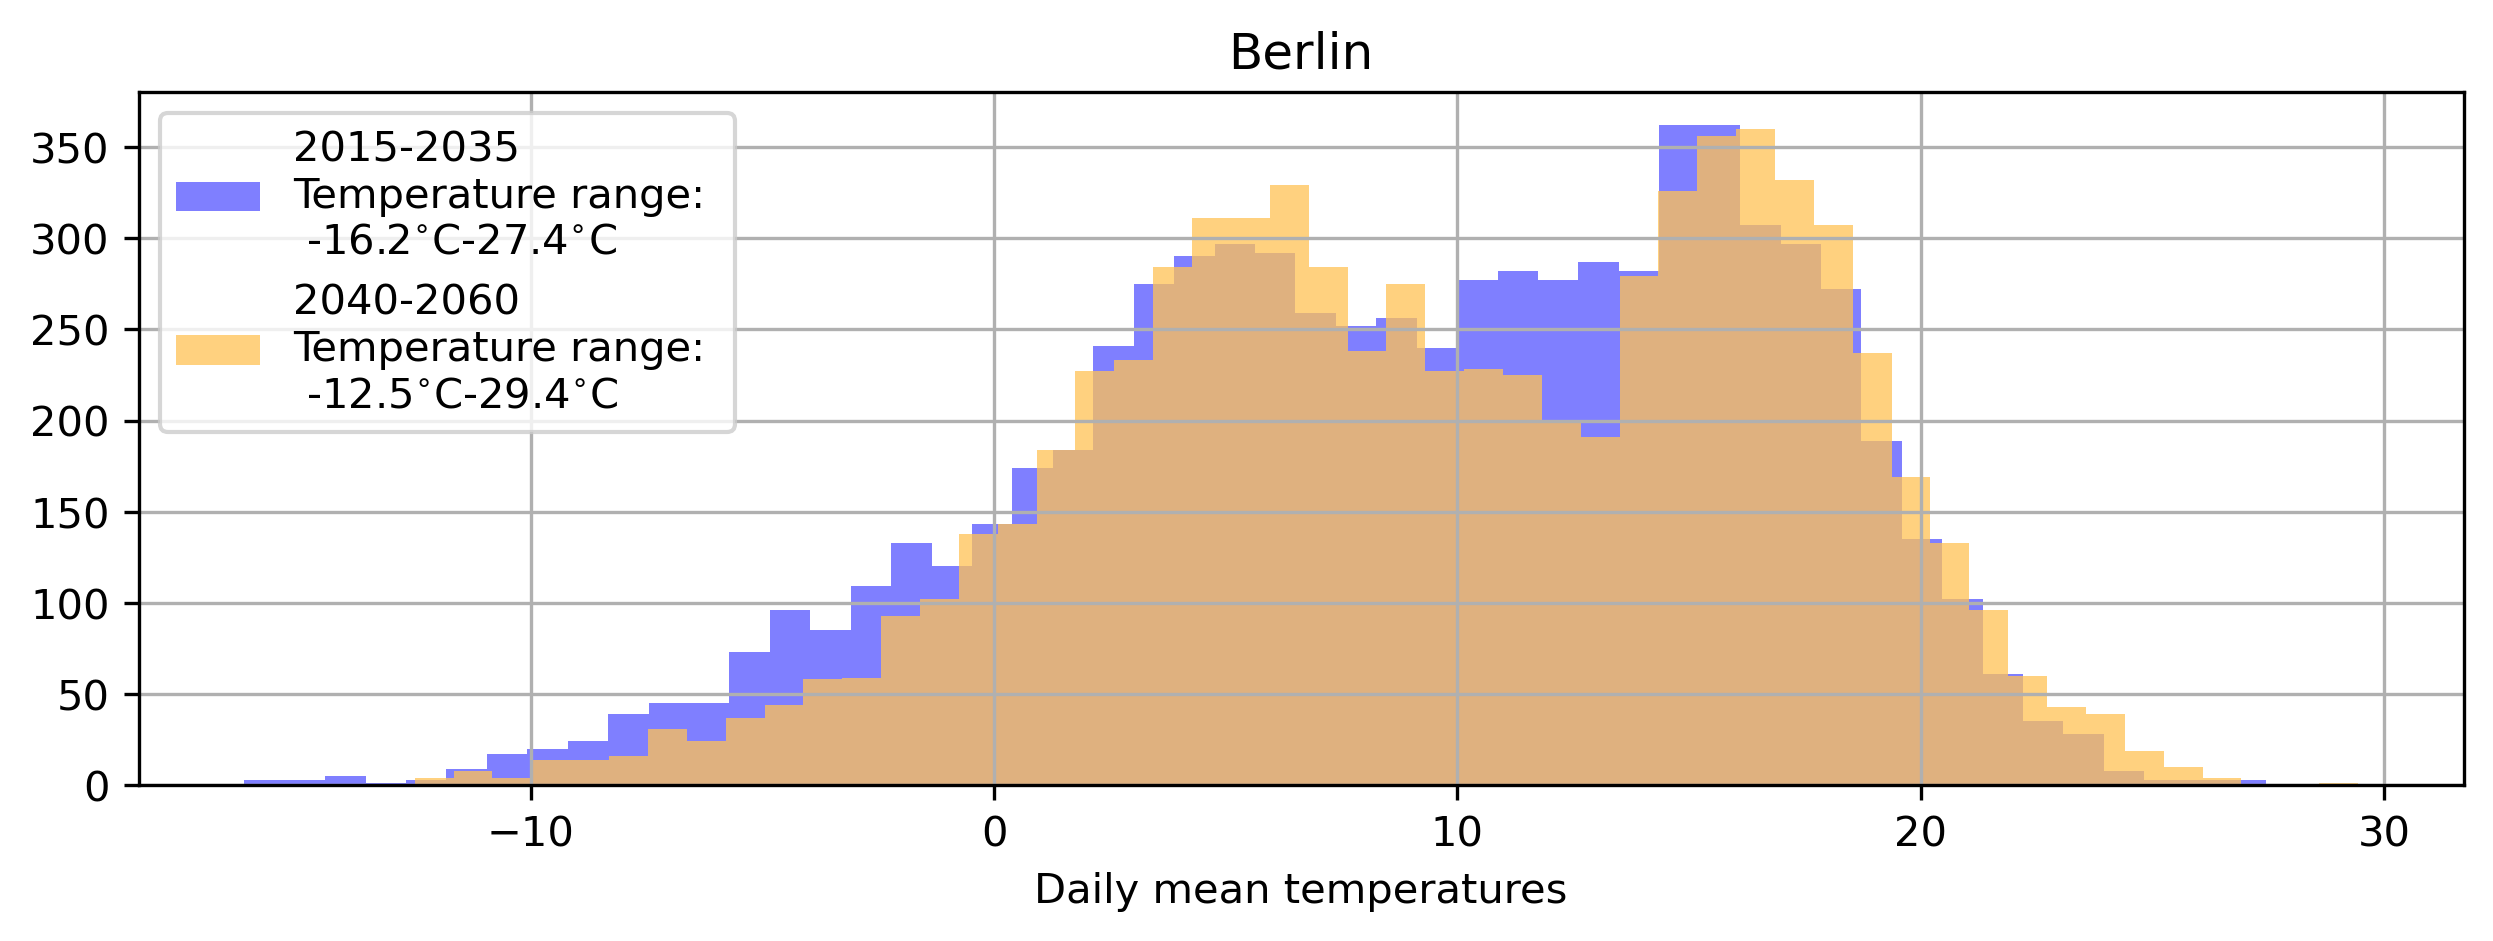

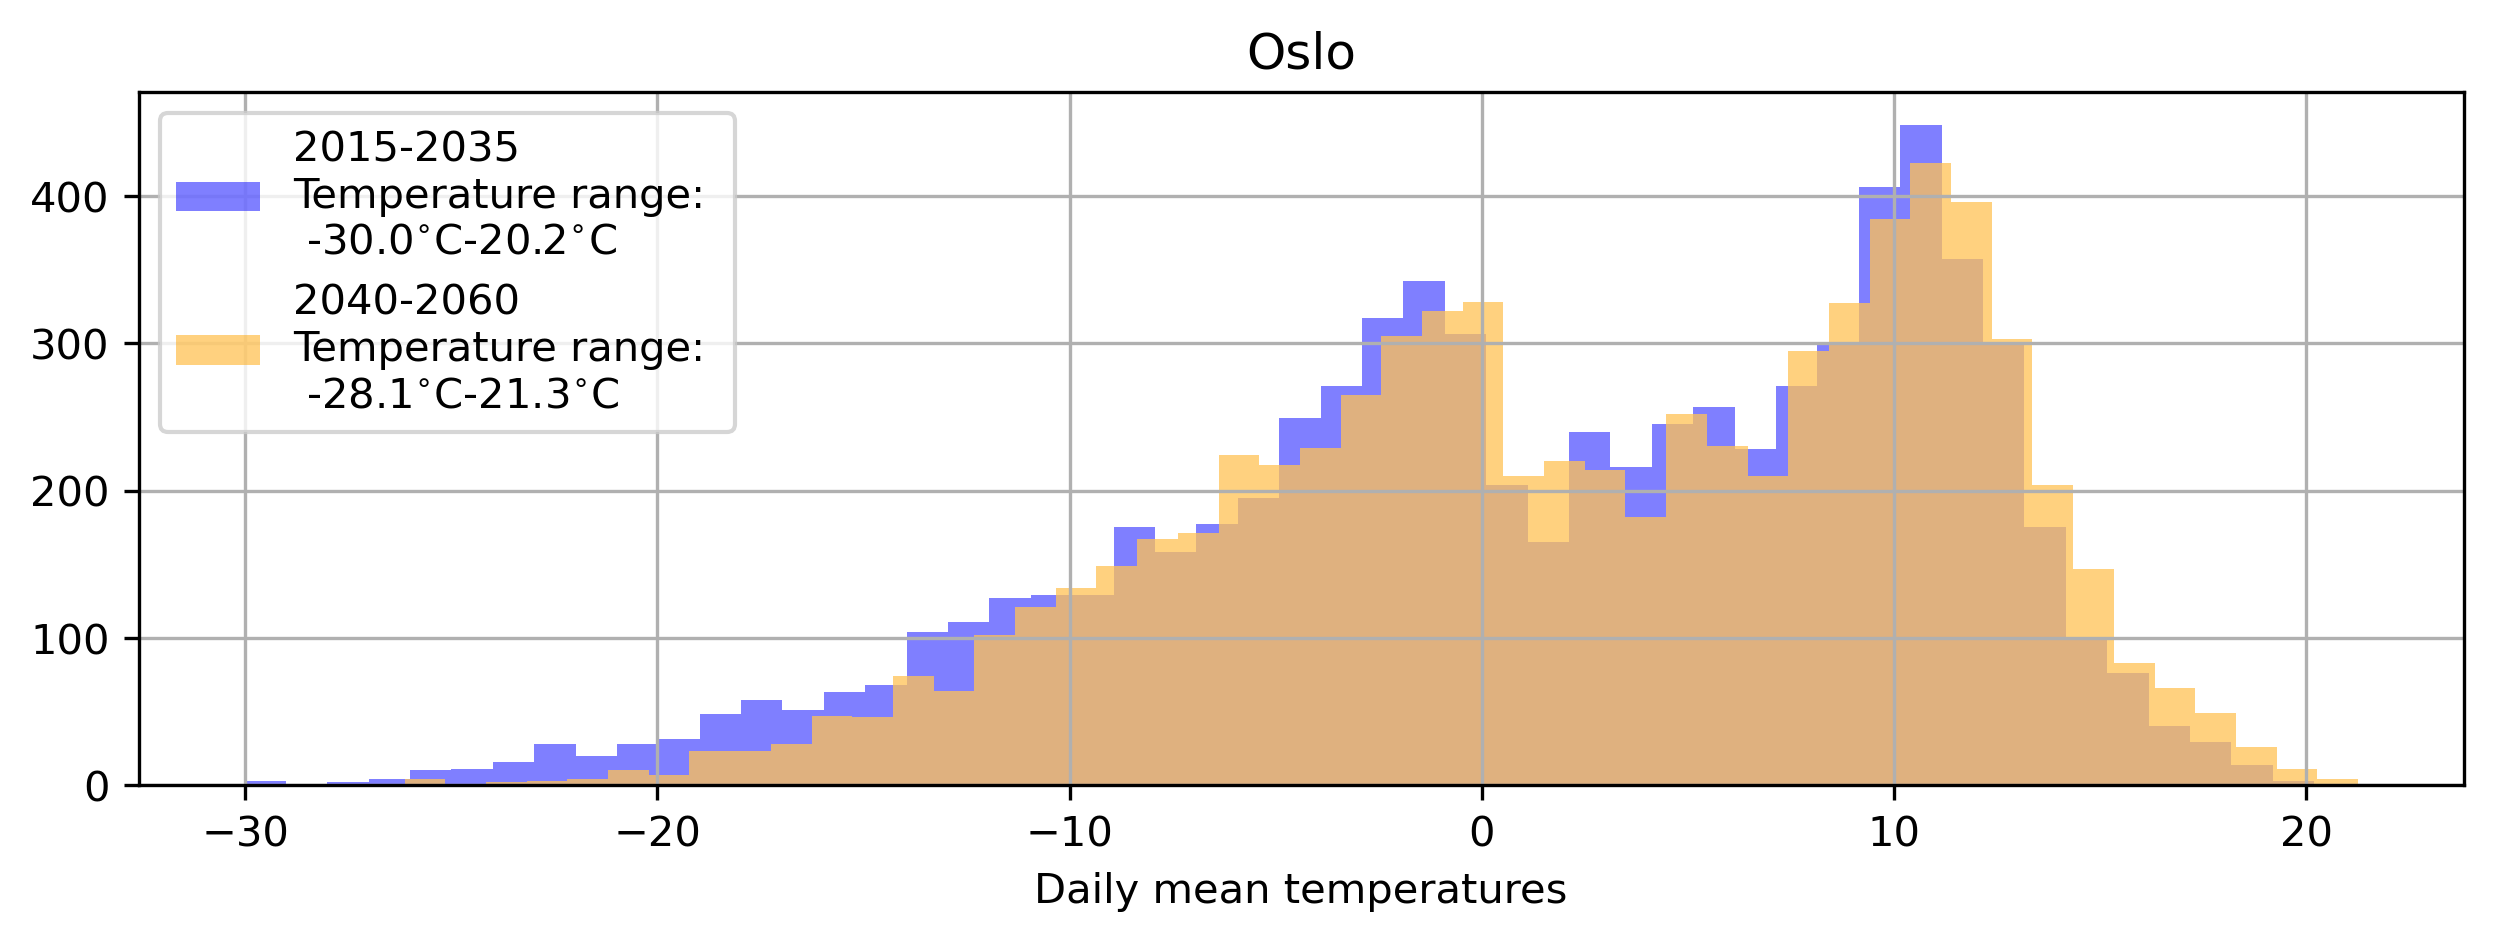

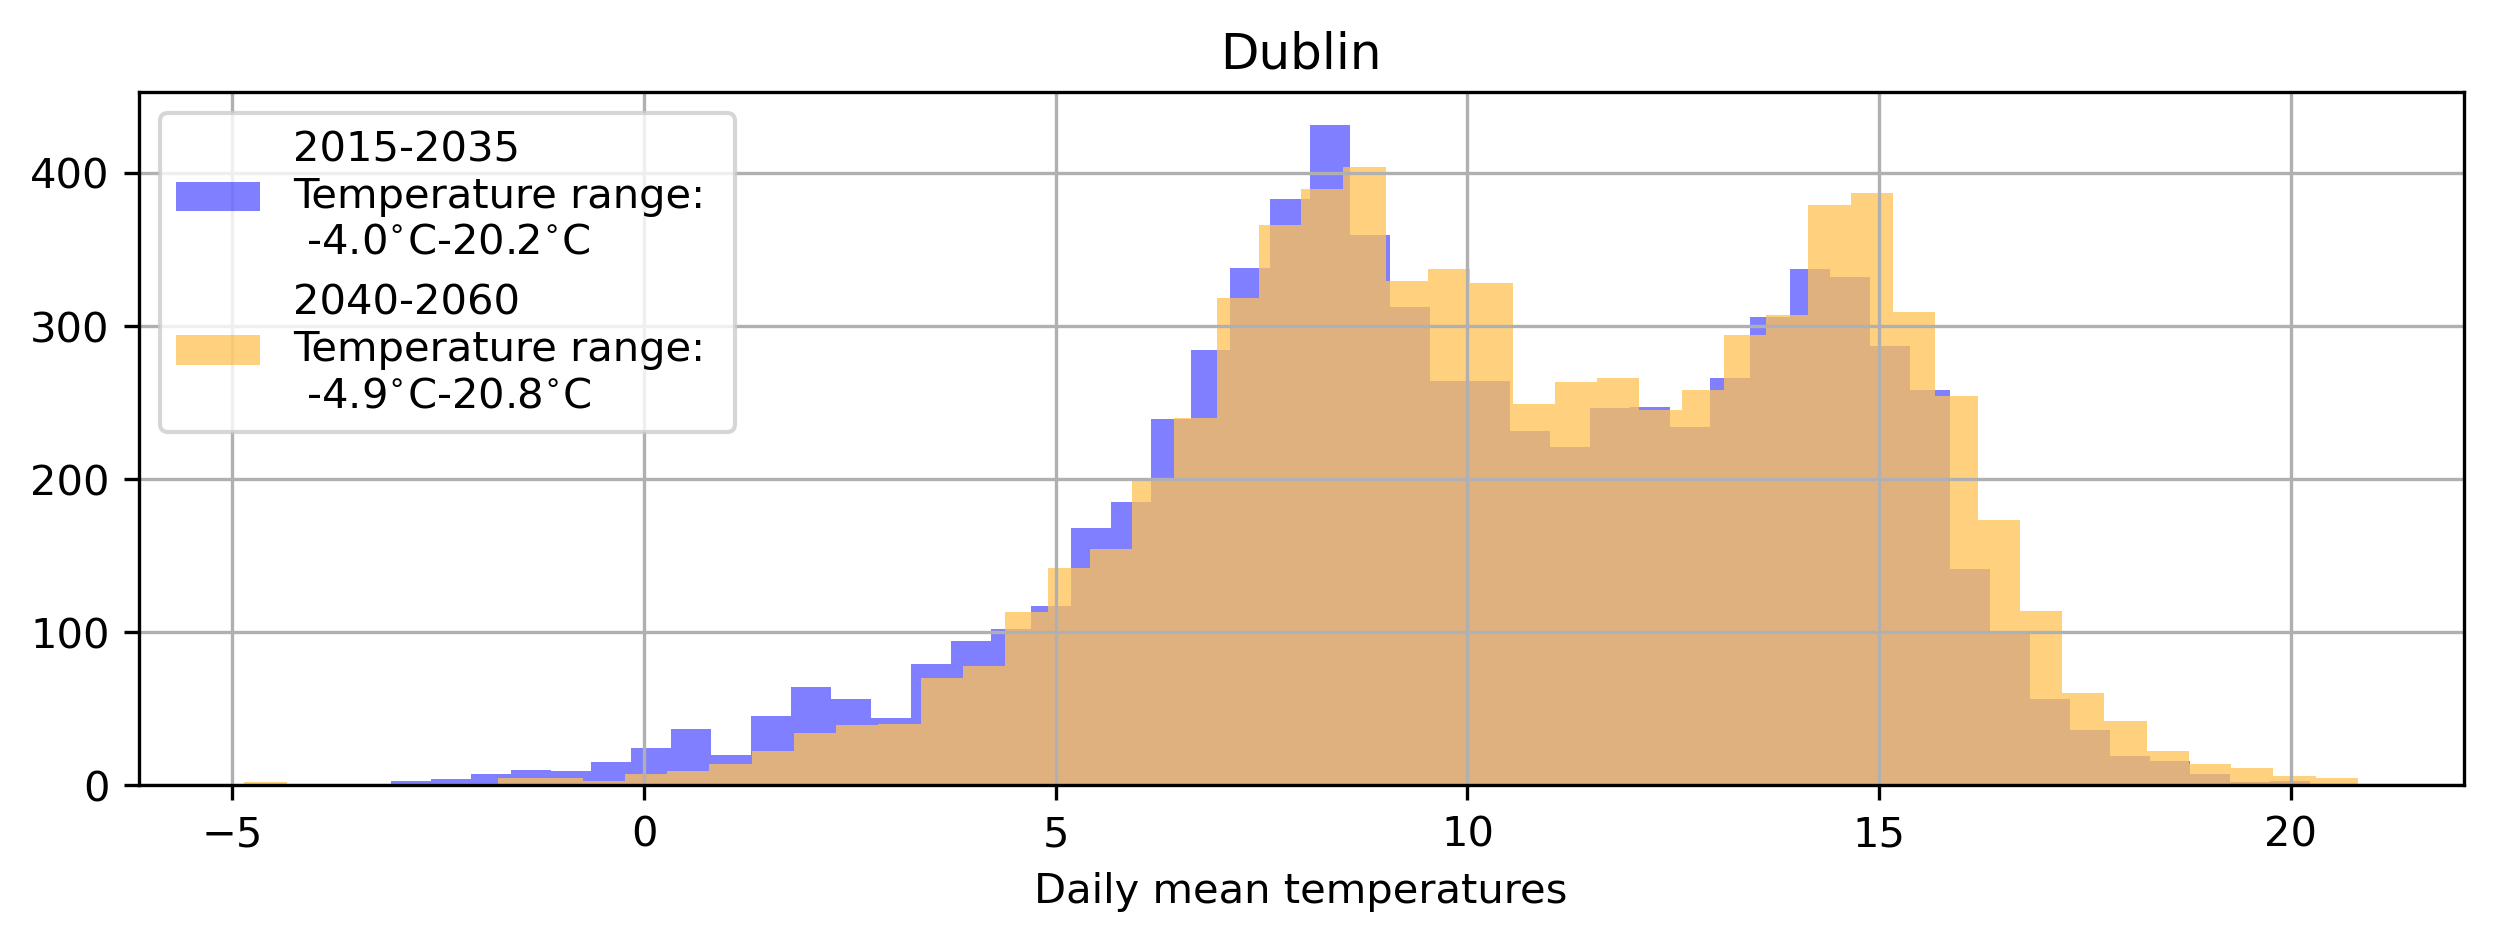

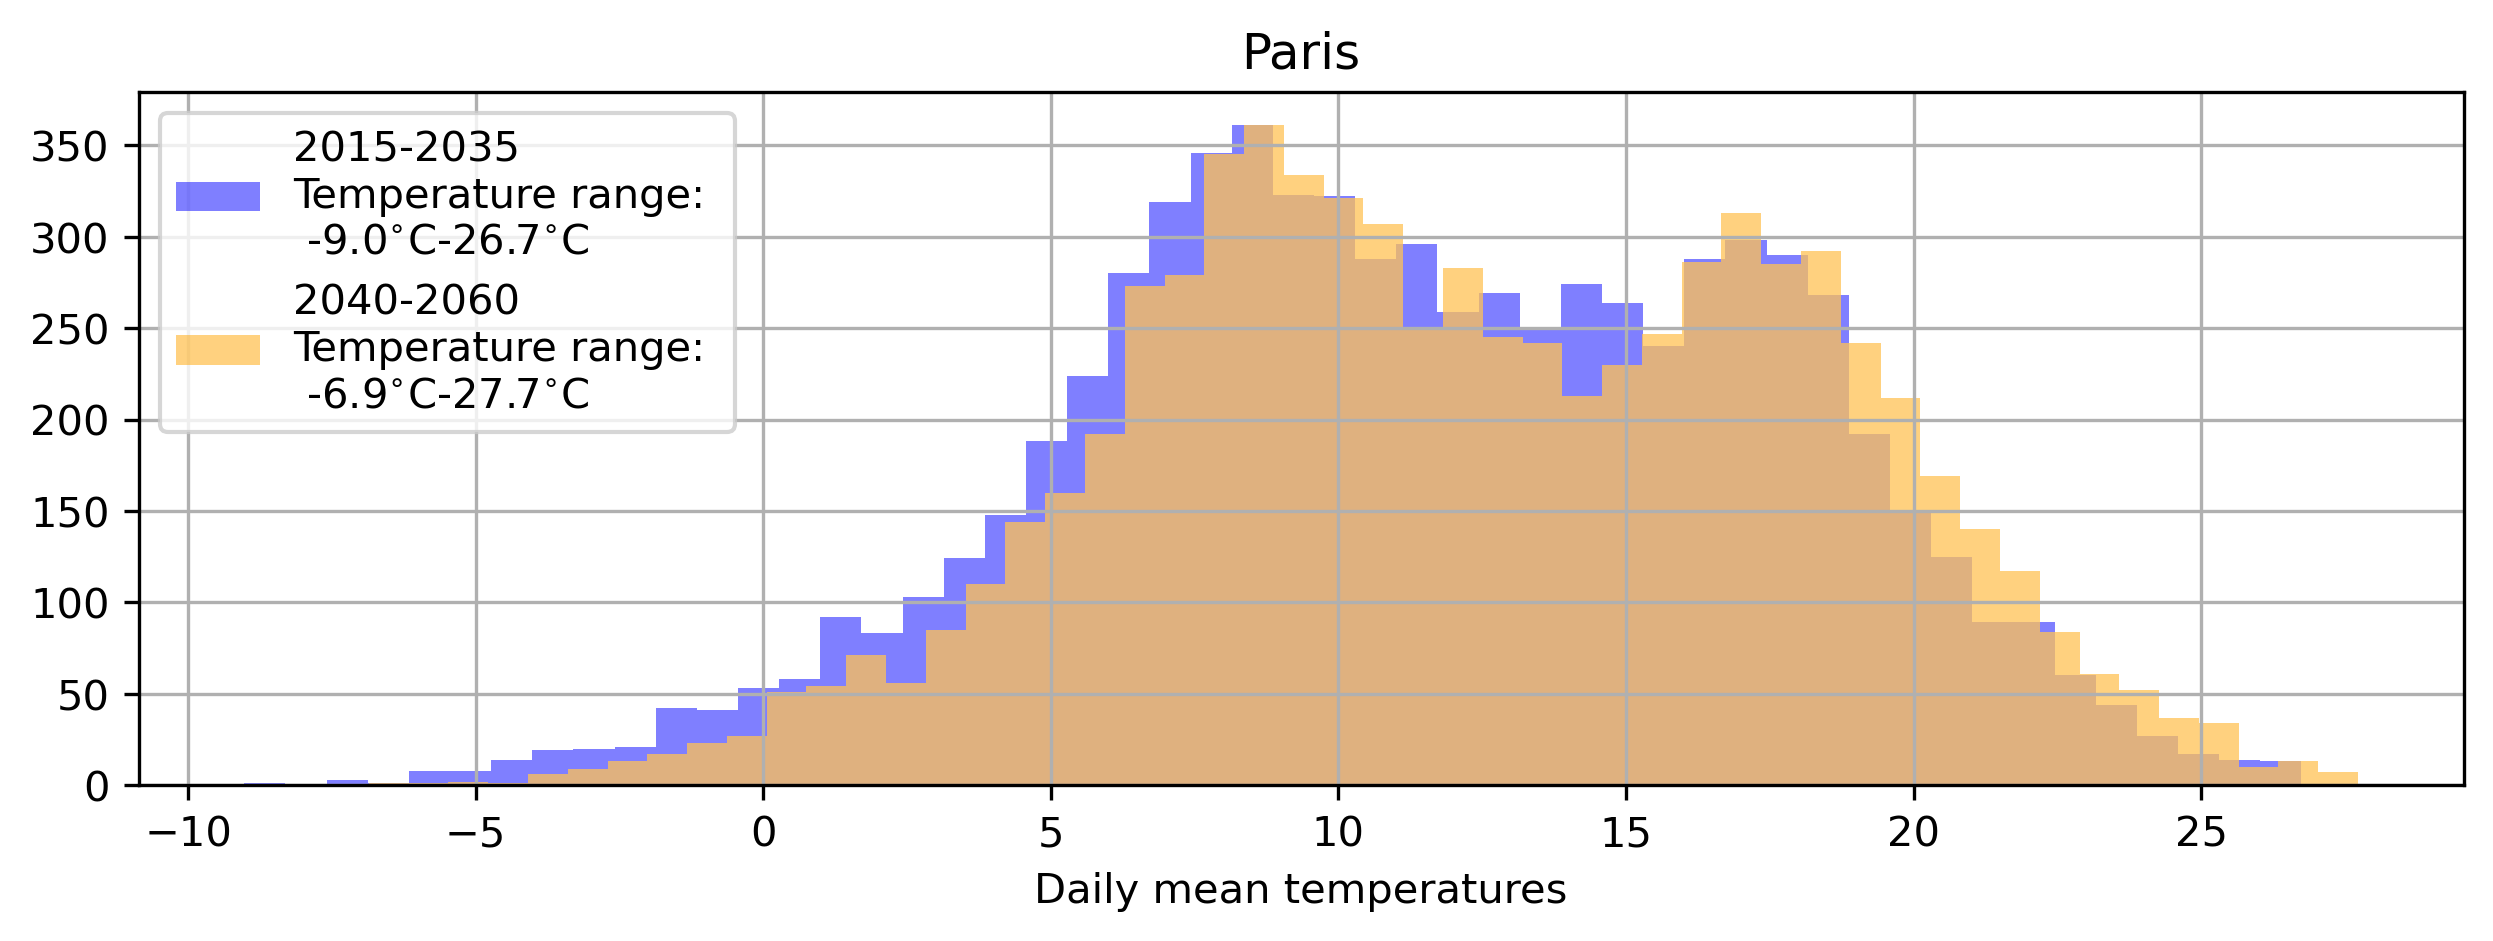

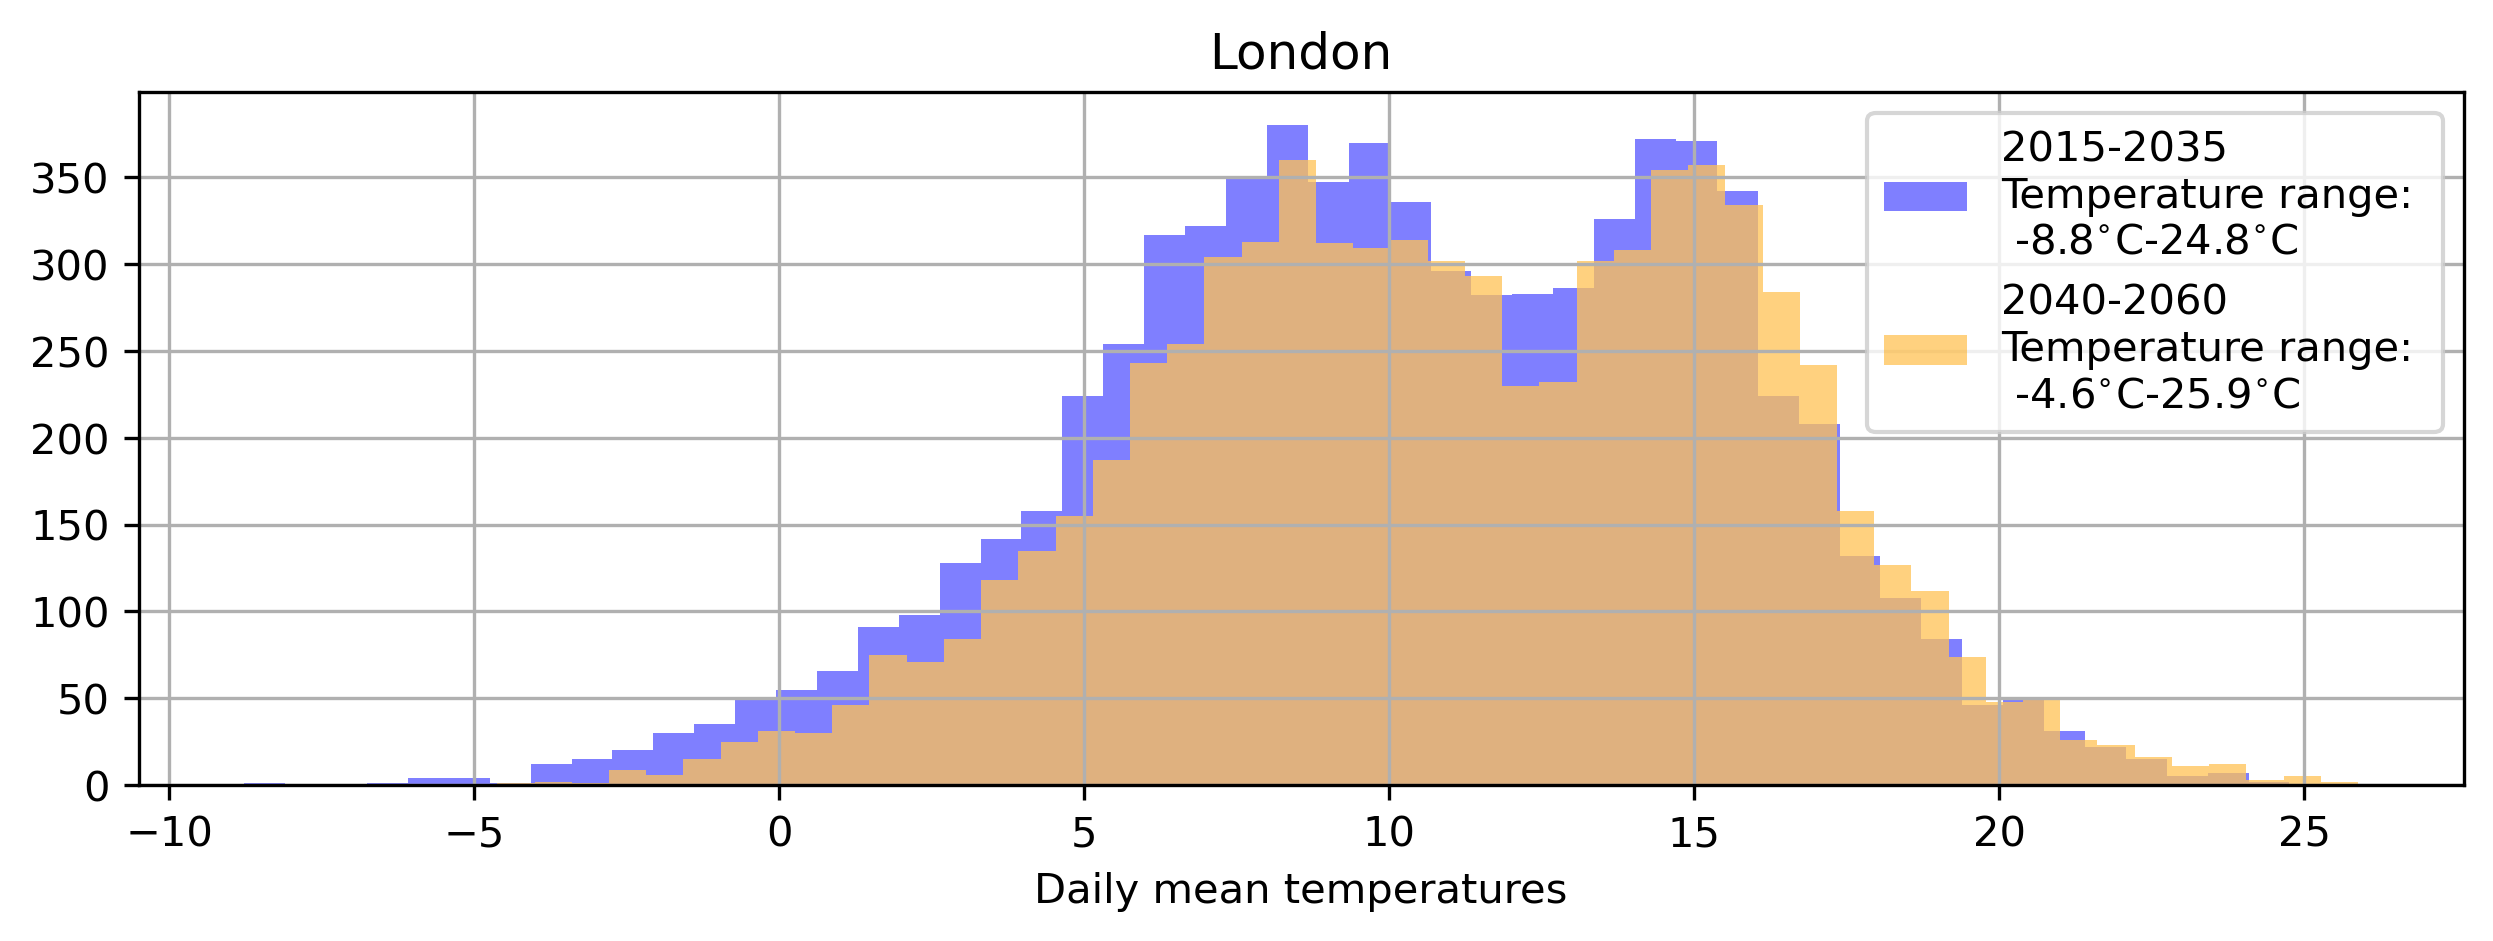

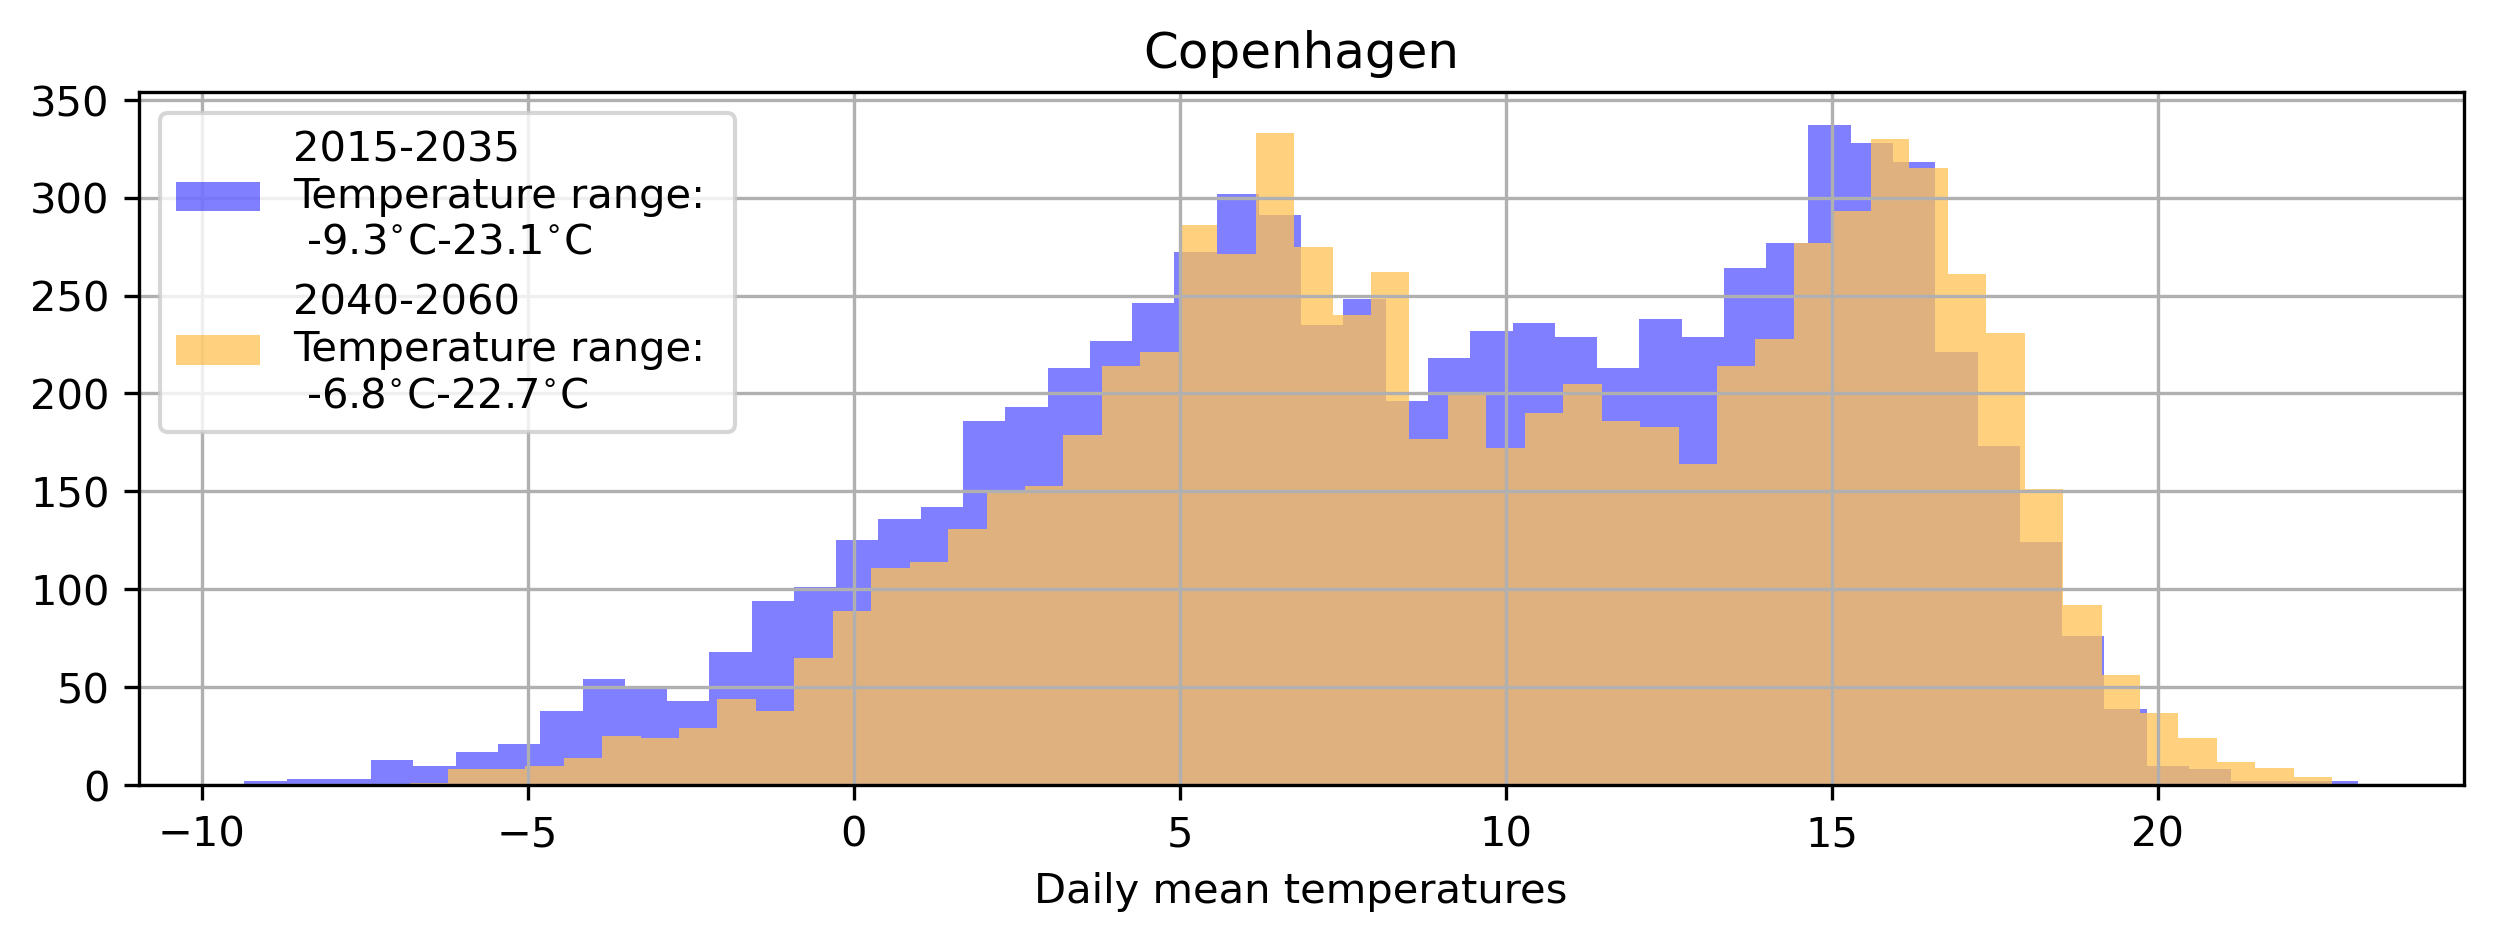

In [3]:
area_names = ['Berlin', 'Oslo', 'Dublin', 'Paris', 'London', 'Copenhagen'] # Choose an area
data_folder = '../CMIP6_data/' # Folder where downloaded CMIP6 data is stored
save_folder = '../figures/pdfs/' # Folder where pdf distributions should be saved
os.makedirs(save_folder, exist_ok=True) 

model_scenario_name = 'MPI-ESM1-2-LR_ssp245'
start_time_1 = '2015-01-01'; end_time_1 = '2034-12-31'
start_time_2 = '2040-01-01'; end_time_2 = '2060-01-01'

files = glob.glob(data_folder+'tas_day_'+model_scenario_name+'*')
files.sort()
tas = xr.open_mfdataset(files)

for area_name in area_names:
        if area_name == 'Berlin':
                lat = 52.5; lon = 13.4
        elif area_name == 'Oslo':
                lat = 59.9; lon = 10.7
        elif area_name == 'Dublin':
                lat = 53.3; lon = 353.7
        elif area_name == 'London':
                lat = 51.5; lon = 359.9
        elif area_name == 'Paris':
                lat = 48.8; lon = 2.3
        elif area_name == 'Copenhagen':
                lat = 55.7; lon = 12.5
        else:
                print("This area is not predefined in the current study, but can be added to the analysis")


        temp_pre = tas.tas.sel(lat=lat, lon=lon, method='nearest').sel(time=slice(start_time_1, end_time_1))

        temp_post = tas.tas.sel(lat=lat, lon=lon, method='nearest').sel(time=slice(start_time_2, end_time_2))

        fig = plt.figure(figsize=[10, 3],dpi=300)
        (n, bins, patches) = plt.hist(temp_pre-273.15, 
                bins=50, alpha=0.5, color='white')
        plt.hist(temp_pre-273.15, 
                bins=50, alpha=0.5, color='blue', label='2015-2035 \nTemperature range: \n '+str(round(bins[0],1))+'$^{\circ}$C-'+str(round(bins[-1],1))+'$^{\circ}$C')
        (n, bins, patches) = plt.hist(temp_post-273.15, 
                bins=50, alpha=0.5, color='white')
        plt.hist(temp_post-273.15, 
                bins=50, alpha=0.5, color='orange', label='2040-2060 \nTemperature range: \n '+str(round(bins[0],1))+'$^{\circ}$C-'+str(round(bins[-1],1))+'$^{\circ}$C')
        plt.title(area_name)
        plt.xlabel('Daily mean temperatures')
        plt.legend()
        plt.grid()
        plt.savefig(save_folder+model_scenario_name+'_'+area_name+'.png')

        plt.show()

## Boxplots for temperature

In [ ]:
area_names = ['Berlin', 'Oslo', 'Dublin', 'Paris', 'London', 'Copenhagen'] # Choose an area

data_folder = '../CMIP6_data/' # Folder where downloaded CMIP6 data is stored
save_folder = '../figures/pdfs/' # Folder where pdf distributions should be saved
os.makedirs(save_folder, exist_ok=True) 

model_scenario_name = 'NorESM2-LM_ssp245'
start_time_1 = '2015-01-01'; end_time_1 = '2034-12-31'
start_time_2 = '2040-01-01'; end_time_2 = '2060-01-01'

files = glob.glob(data_folder+'tas_day_'+model_scenario_name+'*')
files.sort()
tas = xr.open_mfdataset(files)
xticks = []

fig = plt.figure(figsize=[6, 3],dpi=300)
for i in range(len(area_names)):
        area_name = area_names[i]
        if area_name == 'Berlin':
                lat = 52.5; lon = 13.4
        elif area_name == 'Oslo':
                lat = 59.9; lon = 10.7
        elif area_name == 'Dublin':
                lat = 53.3; lon = 353.7
        elif area_name == 'London':
                lat = 51.5; lon = 359.9
        elif area_name == 'Paris':
                lat = 48.8; lon = 2.3
        elif area_name == 'Copenhagen':
                lat = 55.7; lon = 12.5
        else:
                print("This area is not predefined in the current study, but can be added to the analysis")


        temp_pre = tas.tas.sel(lat=lat, lon=lon, method='nearest').sel(time=slice(start_time_1, end_time_1))
        temp_post = tas.tas.sel(lat=lat, lon=lon, method='nearest').sel(time=slice(start_time_2, end_time_2))

        positions = np.array([0.4, 0.8])+np.array([2.5*i, 2.5*i])
        plt.boxplot([temp_pre-273.15, temp_post-273.15], widths = [0.4, 0.4], positions=positions)
        xticks.append(positions[0]+0.2)
plt.xticks(xticks, area_names)
plt.ylabel('Daily temperatures ($^{\circ}$C)')
plt.grid()
plt.savefig(save_folder+model_scenario_name+'_tas.png')
plt.show()

## Boxplots for precipitation

In [ ]:
area_names = ['Berlin', 'Oslo', 'Dublin', 'Paris', 'London', 'Copenhagen'] # Choose an area

data_folder = '../CMIP6_data/' # Folder where downloaded CMIP6 data is stored
save_folder = '../figures/boxplots/' # Folder where pdf distributions should be saved
os.makedirs(save_folder, exist_ok=True) 

model_scenario_name = 'NorESM2-LM_ssp245'
start_time_1 = '2015-01-01'; end_time_1 = '2034-12-31'
start_time_2 = '2040-01-01'; end_time_2 = '2060-01-01'

files = glob.glob(data_folder+'pr_day_'+model_scenario_name+'*')
files.sort()
pr = xr.open_mfdataset(files)

xticks = []
fig = plt.figure(figsize=[6, 3],dpi=300)
for i in range(len(area_names)):
        area_name = area_names[i]
        if area_name == 'Berlin':
                lat = 52.5; lon = 13.4
        elif area_name == 'Oslo':
                lat = 59.9; lon = 10.7
        elif area_name == 'Dublin':
                lat = 53.3; lon = 353.7
        elif area_name == 'London':
                lat = 51.5; lon = 359.9
        elif area_name == 'Paris':
                lat = 48.8; lon = 2.3
        elif area_name == 'Copenhagen':
                lat = 55.7; lon = 12.5
        else:
                print("This area is not predefined in the current study, but can be added to the analysis")


        pr_pre = pr.pr.sel(lat=lat, lon=lon, method='nearest').sel(time=slice(start_time_1, end_time_1))
        pr_post = pr.pr.sel(lat=lat, lon=lon, method='nearest').sel(time=slice(start_time_2, end_time_2))


        positions = np.array([0.4, 0.8])+np.array([2.5*i, 2.5*i])
        plt.boxplot([pr_pre*24*60*60, pr_post*24*60*60], widths = [0.4, 0.4], positions=positions)
        xticks.append(positions[0]+0.2)
plt.xticks(xticks, area_names)
plt.ylabel('Daily precipitation (mm/day)')
plt.grid()
plt.savefig(save_folder+model_scenario_name+'_pr.png')

plt.show()